# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

# Dataset Overiview

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. Labels : 
Label    Description
0.        T-shirt/top
1.        Trouser
2.        Pullover
3.        Dress
4.        Coat
5.        Sandal
6.        Shirt
7.        Sneaker
8.        Bag
9.        Ankle boot

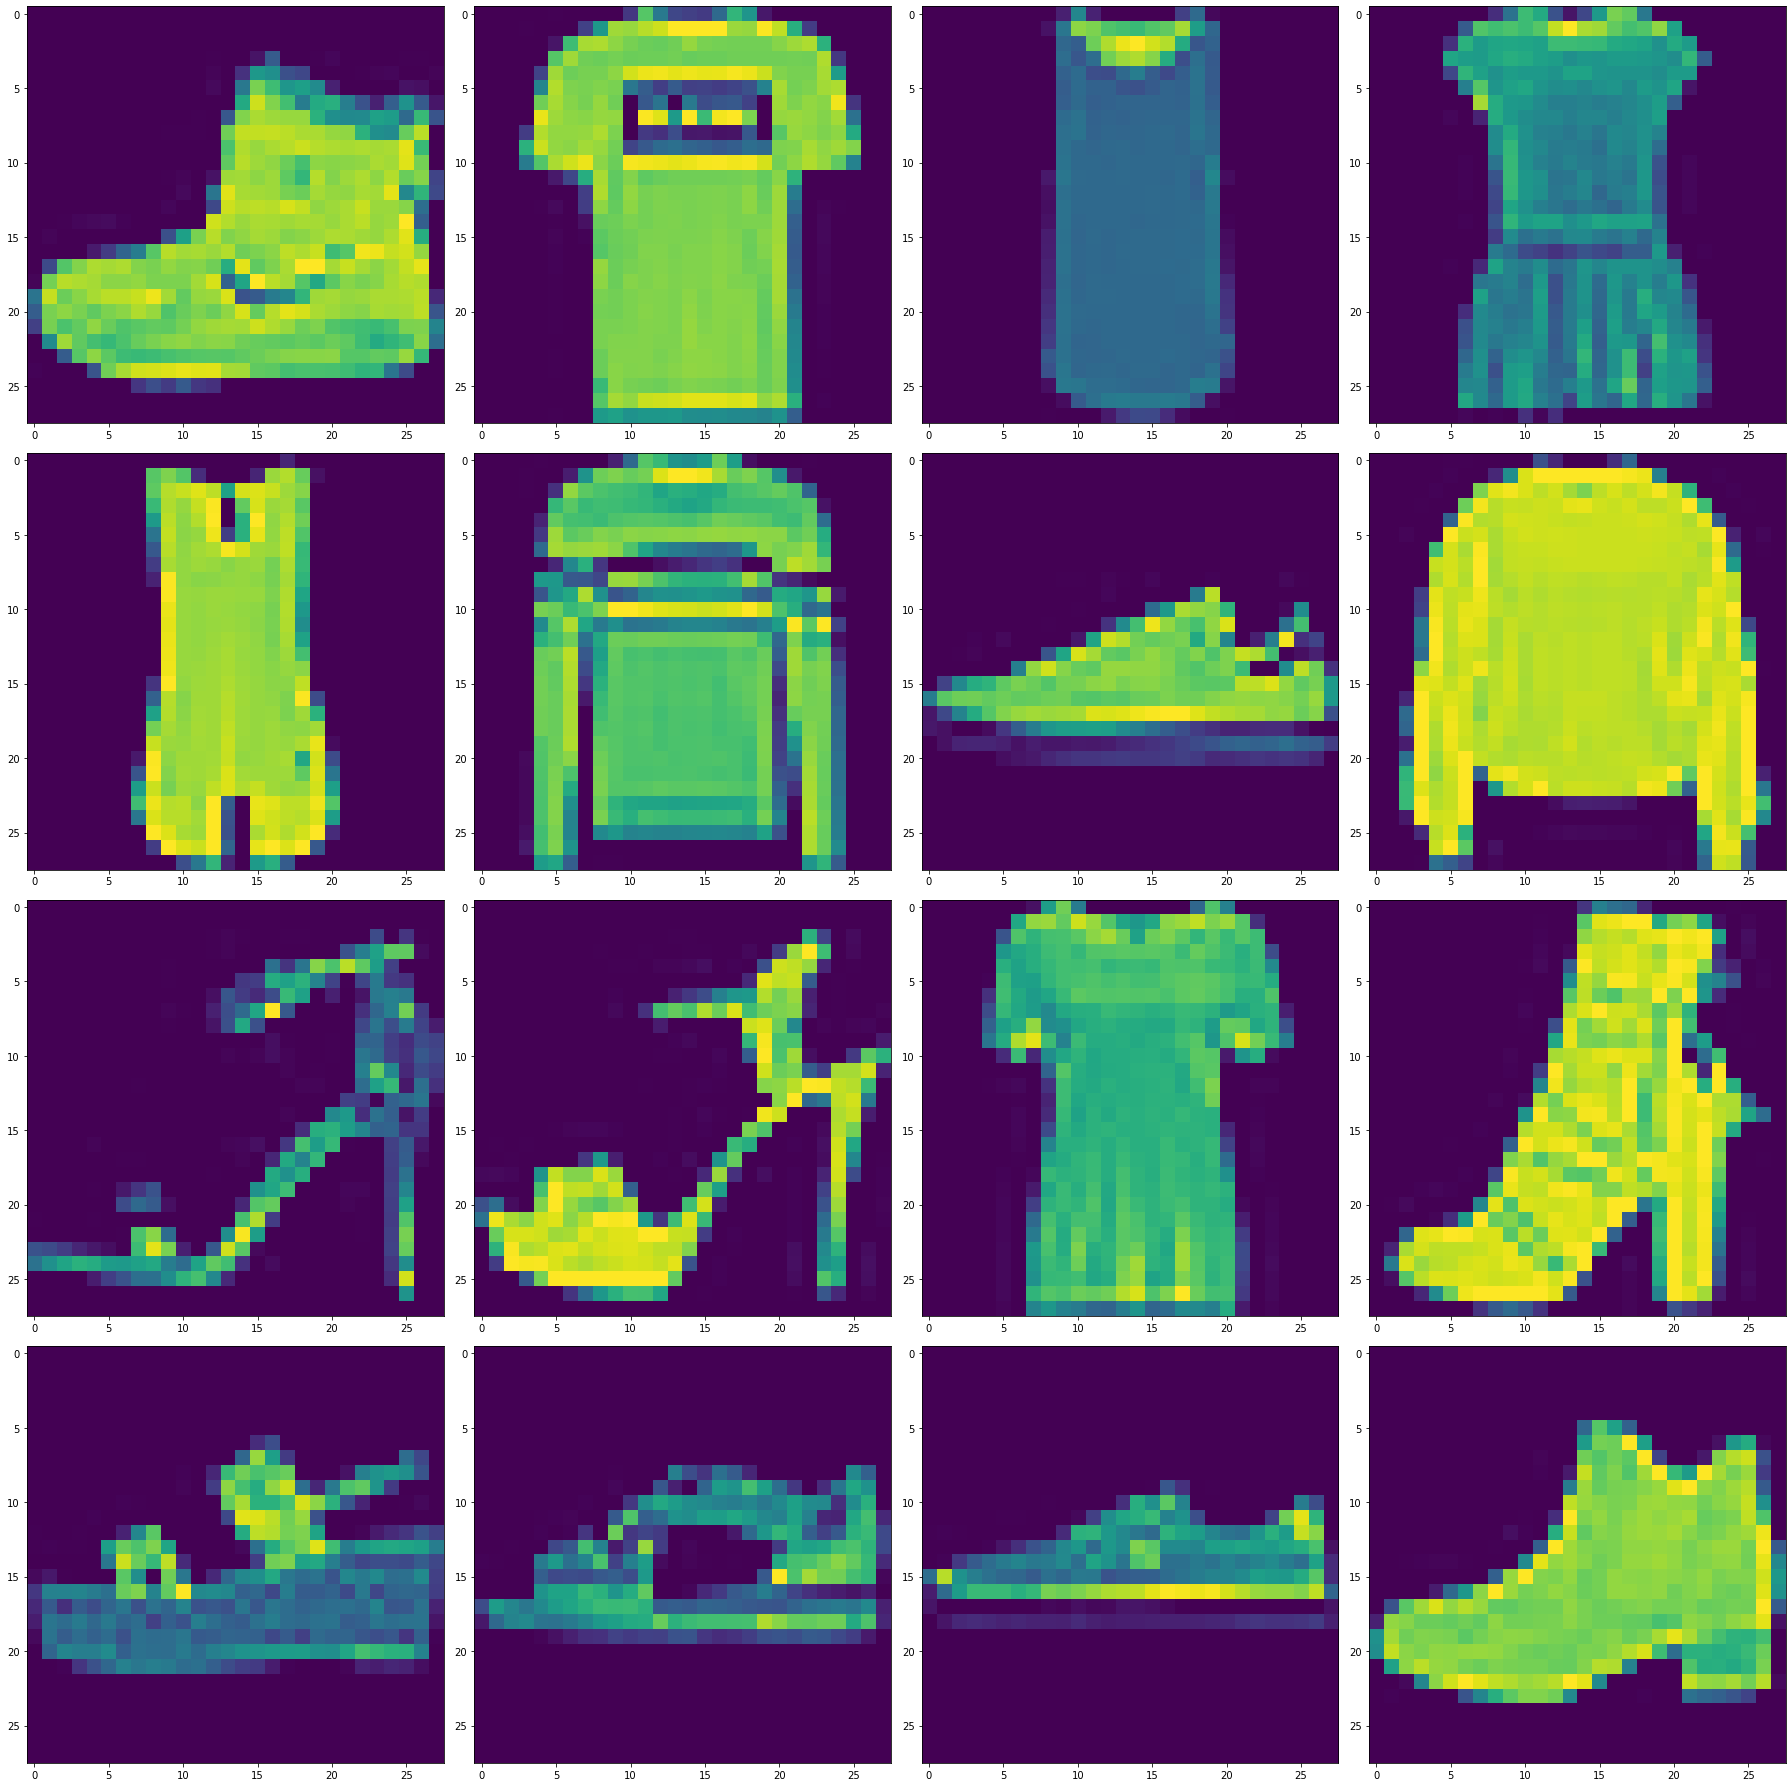

In [9]:
# show glimpse of data
plt.figure(figsize=(25,25))
for i in range(0, 16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_train[i])
    plt.tight_layout()

# Preprocessing

## Normalized Predictor Data

In [13]:
x_train.max(), x_train.min()

(255, 0)

In [14]:
x_train = x_train/255
x_test = x_test/255

## Reshaping Data

In [15]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [16]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

## Encoding to Categorical

In [18]:
from tensorflow.keras.utils import to_categorical

y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

# Modeling

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

## Build Model

In [20]:
model = Sequential()


model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

2022-08-25 23:33:44.844438: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

## Training

In [22]:
model.fit(x_train,y_cat_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.4056 - accuracy: 0.8551
Epoch 2/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2779 - accuracy: 0.8996
Epoch 3/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2392 - accuracy: 0.9148
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2152 - accuracy: 0.9222
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1955 - accuracy: 0.9304
Epoch 6/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1793 - accuracy: 0.9355
Epoch 7/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1683 - accuracy: 0.9405
Epoch 8/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1558 - accuracy: 0.9466
Epoch 9/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1471 - accuracy: 0.9480
Epoch 10/10
1875/1875 [==============================] - 31s 17m

## Evaluation

In [23]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.3319 - accuracy: 0.9049


[0.33194318413734436, 0.9049000144004822]

In [24]:
from sklearn.metrics import classification_report
predictions = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 2s 6ms/step


In [25]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.89      0.83      0.86      1000
           3       0.91      0.92      0.92      1000
           4       0.85      0.88      0.86      1000
           5       0.93      0.99      0.96      1000
           6       0.71      0.79      0.75      1000
           7       0.98      0.91      0.94      1000
           8       0.99      0.98      0.98      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.91     10000
weighted avg       0.91      0.90      0.91     10000

